In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('./data/train.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split

x = train.drop(['label'], axis=1)

y = train['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1001)

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score, roc_curve
accuracy_score(y_test, y_pred)

0.94119047619047624

In [14]:
y_pred[:10]

array([3, 9, 6, 8, 0, 8, 2, 9, 0, 0])

In [66]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm  

cfm = confusion_matrix(y_test, y_pred)

cfm

array([[809,   0,   3,   2,   0,   2,   5,   0,   6,   1],
       [  0, 912,   4,   3,   1,   0,   0,   1,   1,   2],
       [  2,   8, 815,   9,   3,   0,   4,   8,   5,   1],
       [  3,   2,  21, 782,   0,  11,   1,   5,  17,   3],
       [  2,   2,   2,   1, 770,   0,   6,   2,   1,  22],
       [  8,   4,   3,  31,   4, 724,  10,   1,   4,   5],
       [  5,   3,   5,   2,   3,  11, 764,   0,   3,   0],
       [  1,   6,  18,   3,  14,   1,   1, 856,   1,   9],
       [  6,   8,  12,  21,   7,  15,   9,   3, 740,  11],
       [  3,   0,   4,  19,  15,   3,   1,  15,  14, 734]])

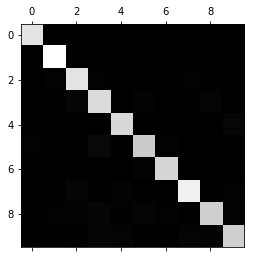

In [21]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
    
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

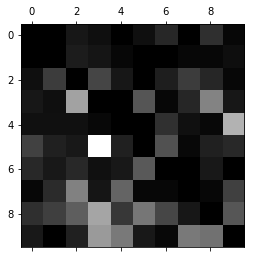

In [22]:
row_sums = cfm.sum(axis=1, keepdims=True)
norm_conf_mx = cfm / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [24]:
from sklearn.model_selection import cross_val_predict

y_probas_forest = cross_val_predict(model, x_train, y_train, cv=3,
                                    method="predict_proba")

y_probas_forest

array([[ 0. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0.1,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ..., 
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0.9],
       [ 0. ,  0.1,  0.5, ...,  0.2,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

In [27]:
test = pd.read_csv('./data/test.csv')

test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
test_pred = model.predict(test)

In [34]:
sub = pd.DataFrame({'Label': test_pred})

sub['ImageId'] = sub.index + 1

sub.head()

,Label,ImageId
0,2,1
1,0,2
2,9,3
3,9,4
4,3,5


In [35]:
sub.to_csv('./data/sub.csv', index=False)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
knn_pred = knn.predict(test)

In [40]:
sub = pd.DataFrame({'Label': knn_pred})

sub['ImageId'] = sub.index + 1

sub.head()

,Label,ImageId
0,2,1
1,0,2
2,9,3
3,9,4
4,3,5


In [41]:
sub.to_csv('./data/sub.csv', index=False)

# Todo

1. [ ] Preproccess the training data by shifting all entries up, left, down, right by 1px 
2. [ ] Find the best params for knn 

In [46]:
x_mat = np.asmatrix(x)

y_arr = np.array(y)

x_mat.shape

(42000, 784)

In [61]:
x_mat = train.iloc[:,1:].values.reshape(-1,28,28,1)
    
x_mat.shape

y_arr.shape

(42000,)

In [70]:
import keras.preprocessing.image

## augment data

# generate new images via rotations, translations, zoom using keras
def generate_images(imgs):
    
    # rotations, translations, zoom
    image_generator = keras.preprocessing.image.ImageDataGenerator(
        rotation_range = 10, width_shift_range = 0.1 , height_shift_range = 0.1,
        zoom_range = 0.1)

    # get transformed images
    imgs = image_generator.flow(imgs.copy(), np.zeros(len(imgs)),
                                batch_size=len(imgs), shuffle = False).next()    
  
    return imgs[0]

# global variables to store augmented data
x_train_aug = 0
y_train_aug = 0

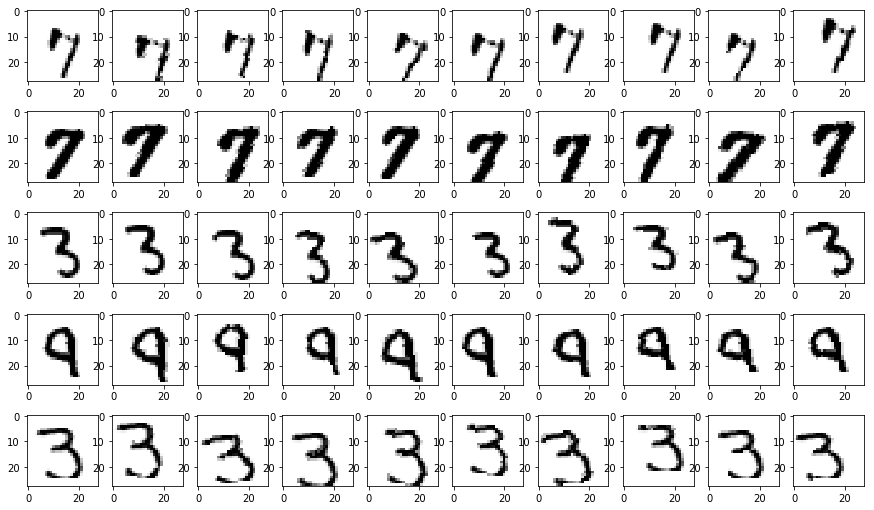

In [71]:
fig,axs = plt.subplots(5,10, figsize=(15,9))
for i in range(5):
    n = np.random.randint(0,x_mat.shape[0]-2)
    axs[i,0].imshow(x_mat[n:n+1].reshape(28,28),cmap=cm.binary)
    axs[i,1].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,2].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,3].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,4].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,5].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,6].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,7].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,8].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,9].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)

1

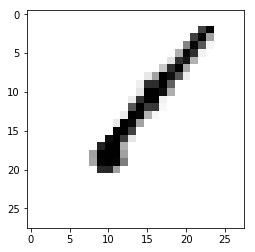

In [83]:
generate_images(x_mat[0:1])[0]
plt.imshow(generate_images(x_mat[0:2])[0].reshape(28,28), cmap=cm.binary)
y_arr[0]

In [84]:
x_gen = generate_images(x_mat)

x_gen.shape

(42000, 28, 28, 1)

In [89]:
x_all = np.append(x_mat, x_gen, axis=0)
x_all.shape

(84000, 28, 28, 1)

In [88]:
print(x_gen.shape)
x_mat.shape

(42000, 28, 28, 1)


(42000, 28, 28, 1)

In [90]:
y_all = np.append(y, y, axis=0)

y_all.shape

(84000,)

In [94]:
knn = KNeighborsClassifier()

knn.fit(np.reshape(x_all, (84000, 784)), y_all)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [93]:
x_res = np.reshape(x_all, (84000, 784))

In [95]:
knn_pred = knn.predict(test)

sub = pd.DataFrame({'Label': knn_pred})

sub['ImageId'] = sub.index + 1

sub.head()

,Label,ImageId
0,2,1
1,0,2
2,9,3
3,9,4
4,3,5


In [96]:
sub.to_csv('./data/sub.csv', index=False)